In [17]:
import pytesseract
import cv2
import time
import HelperFunc
from selenium import webdriver
import matplotlib.pyplot as plt

In [18]:
driver = webdriver.Firefox()
driver.get("https://logigames.bet9ja.com/games.ls?page=launch&gameid=18000&skin=12&sid=&pff=1&tmp=1611946195")
time.sleep(5)

In [9]:
GAME_CANVAS = "layer2"
game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

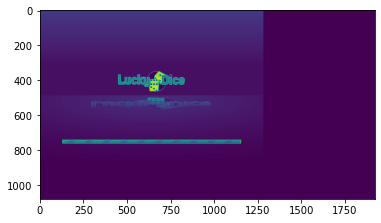

In [10]:
plt.imshow(game_img)

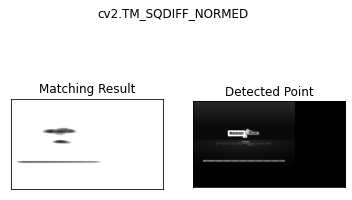

In [11]:
tmp =  HelperFunc.getTemplate("continue")
game_image = HelperFunc.getGameImage(driver, GAME_CANVAS)
coord  = HelperFunc.detectTemplate(game_image, tmp, True, -1)
HelperFunc.clickScreen(driver,coord[0] )

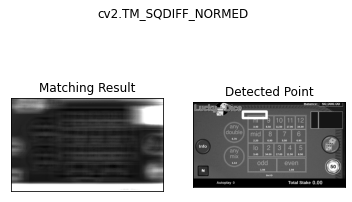

In [22]:
game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)

In [23]:
r_stake = (184, 484, 116, 124)

In [24]:
#r = cv2.selectROI(game_image)
# Crop image
def cropRegion(r, img):
    return img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]


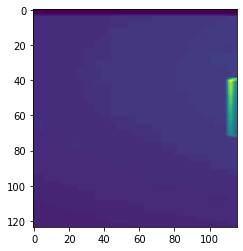

In [25]:
img = cropRegion(r_stake, game_image)
plt.imshow(img)

r

balance_coordinates = (1060, 9, 187, 32)

In [9]:
import cv2
import numpy as np

img = cv2.imread('image.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
def detect_signature(image):
    vis = image.copy()
    mser = cv2.MSER_create()
    regions = mser.detectRegions(image)
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
    xs = []
    ys = []
    for hull in hulls:
        x,y,w,h = cv2.boundingRect(hull)
        xmin, ymin, xmax, ymax = x,y,x+w,y+h
        xs.append(xmin)
        xs.append(xmax)
        ys.append(ymin)
        ys.append(ymax)
    xmin_ = min(xs)
    xmax_ = max(xs)
    ymin_ = min(ys)
    ymax_ = max(ys)
    xmin_, ymin_, xmax_, ymax_
    roi = image[ymin_:ymax_, xmin_:xmax_]
    return roi

def colorThreshold(img, rbg_threshold = (60,60,60)):
    """
    Return Binary Image which is thresholded by thr rbg pixel vales 
    given in rbg_threshold i.e. If pixel is > thres assign 1
    and if pixel is < thres assing 0
    args:
          img - img to be thresholded
          rbg_threshold - (r,g,b)
    """
    temp = np.zeros(img.shape)
    rflags_h = img[:,:]>rbg_threshold[0]

    temp[:,:][rflags_h] = 1
    
    return temp

In [34]:
def retrieveAmount(driver):
    """
    Return current Amount (int) the player currently has.
    args: Created Selenium webdriver
    """
    bal_region = (1060, 9, 187, 32)
    game_img = HelperFunc.getGameImage(driver, GAME_CANVAS)
    # Crop image
    imCrop = game_image[int(bal_region[1]):int(bal_region[1]+bal_region[3]), 
                        int(bal_region[0]):int(bal_region[0]+bal_region[2])]
    im1 = HelperFunc.colorThreshold(imCrop)
    img1 = np.abs(im1.astype( int) - 255)
    img1 = np.array(img1).astype('uint8')
    custom_config = r'--oem 3 --psm 6'
    string_balance = pytesseract.image_to_string(img1, config=custom_config)
    return int(string_balance.split('\n')[0].replace(',', '').replace('.', ''))

In [35]:
s = retrieveAmount(driver)

In [36]:
s

5000000

In [29]:
ms.replace('0', '9')

'59'

In [27]:
ls

'000.00'

In [48]:
str(str1)== "Six\n\x0c"

False

In [72]:
driver.close()